In [16]:
## FFR120
# Felix Waldschock 2023

## Exercise 1.6 Two dimensional gas in a box  

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

In [18]:
# determine simulation parameters
N = 100 # number of particles
eta_0 = 1
sigma_0 = 1
m_0 = 1
L = 100 * sigma_0 # length of the box
v_0 = np.sqrt(2 * eta_0 / m_0) # initial velocity


$v_0 = \sqrt{2\eta / m_0}$  
$t_0 = \sigma_0\sqrt{m_0 / 2 \eta}$

In [19]:
# particle class
class Particle:
    def __init__(self, x, y, vx, vy):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy

    def getPositions(self):
        return self.x, self.y
    
    def getVelocities(self):
        return self.vx, self.vy
    

Text(0.5, 1.0, 'Velocity field')

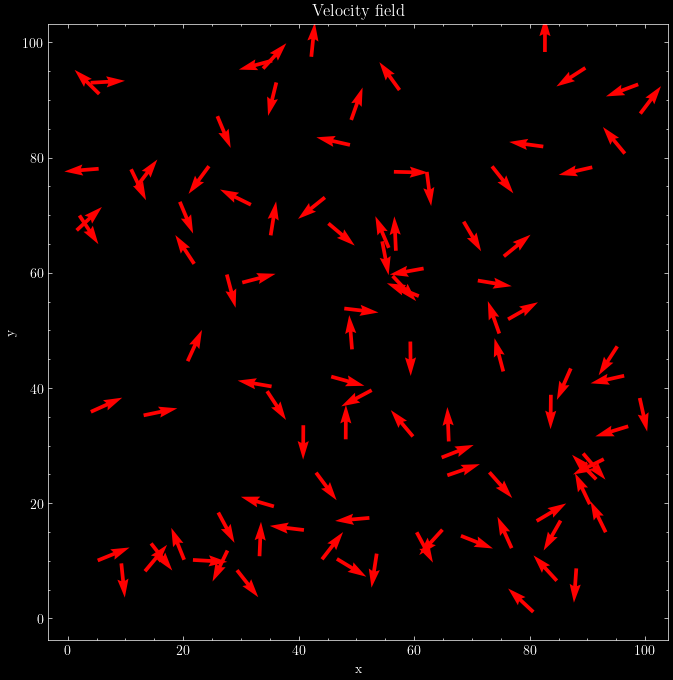

In [20]:
# init the velocities, random direction

magnitude = 2 * v_0
v = np.ones((N,2))
for i in range(N):
    randAngle = np.random.rand() * 2 * np.pi
    v[i,0] = np.sin(randAngle) * magnitude
    v[i,1] = np.cos(randAngle) * magnitude

# init the positions and ensure that all particles have a distance of at least sigma_0
r = np.random.rand(N,2) * L
for i in range(N):
    for j in range(N):
        if i != j:
            while np.linalg.norm(r[i] - r[j]) < sigma_0:
                r[i] = np.random.rand(2) * L

Particles = []
for i in range(N):
    Particles.append(Particle(r[i,0], r[i,1], v[i,0], v[i,1]))

r_init = r
v_init = v

# plot velocities at positions in a vector field
plt.figure(figsize=(8,8))
plt.quiver(r[:,0], r[:,1], v[:,0], v[:,1], color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Velocity field')



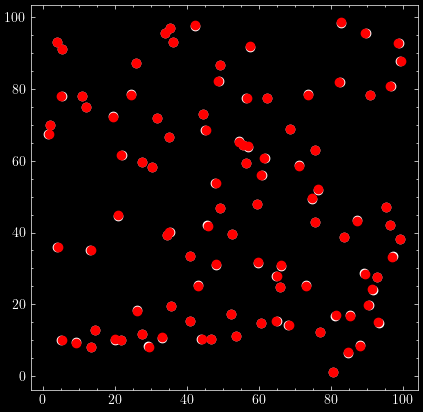

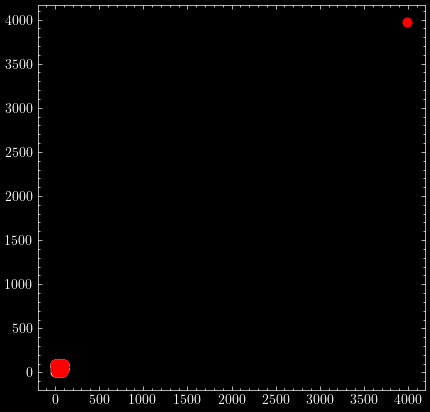

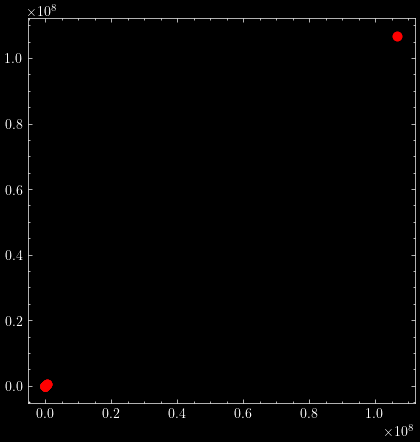

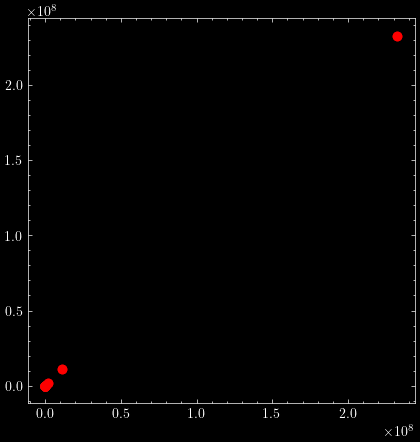

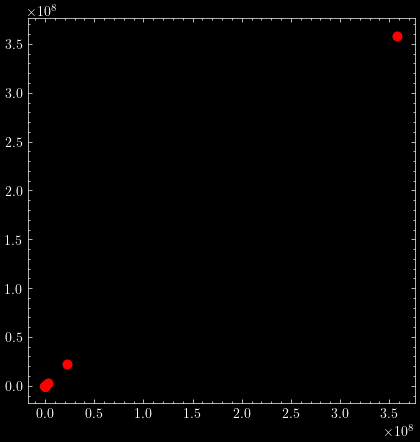

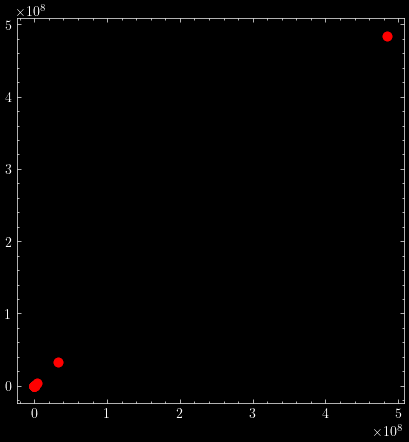

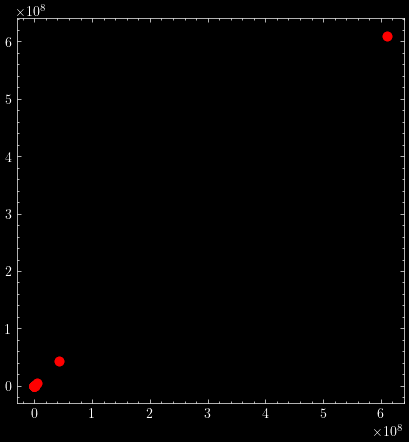

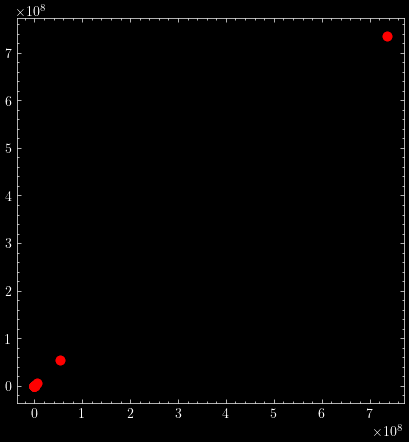

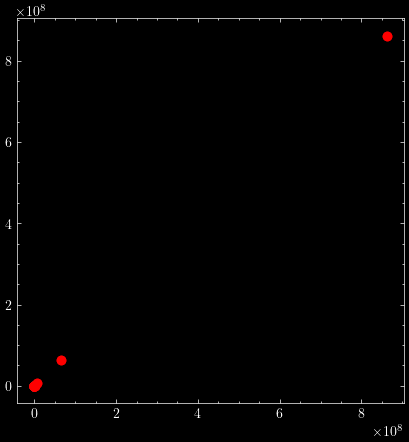

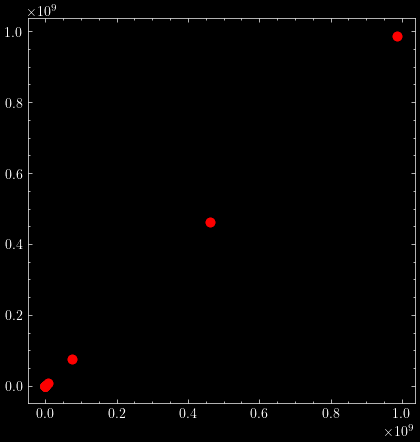

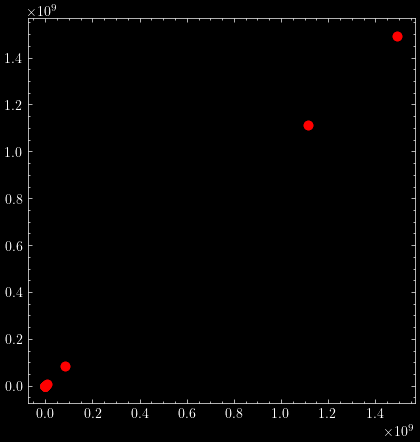

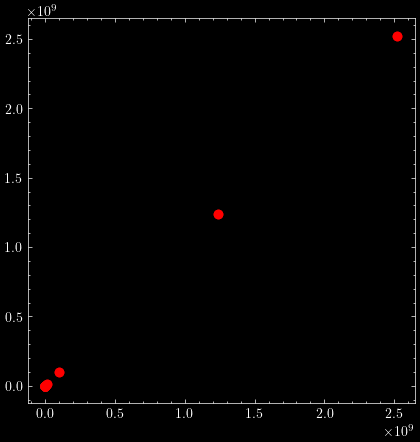

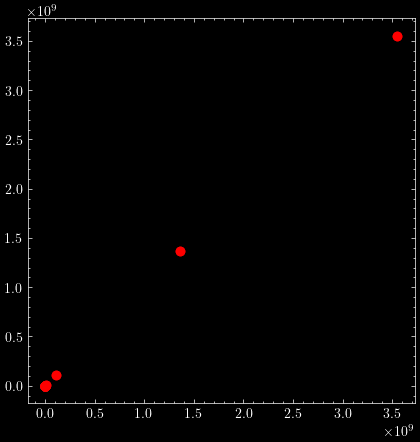

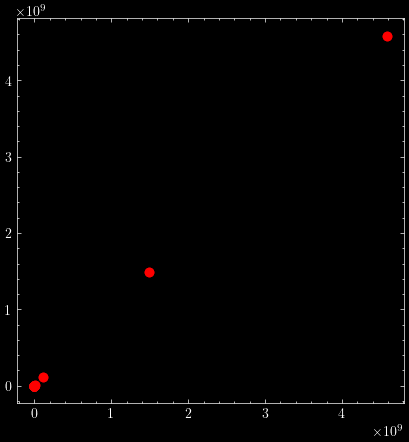

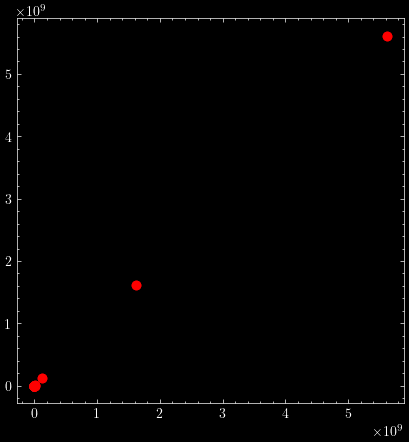

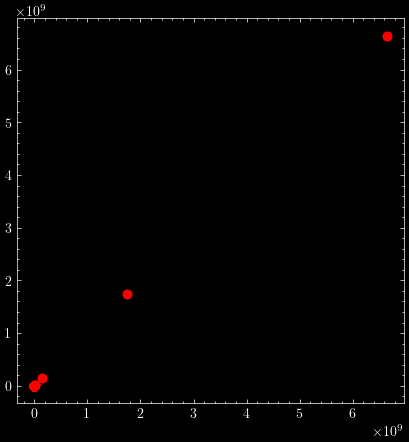

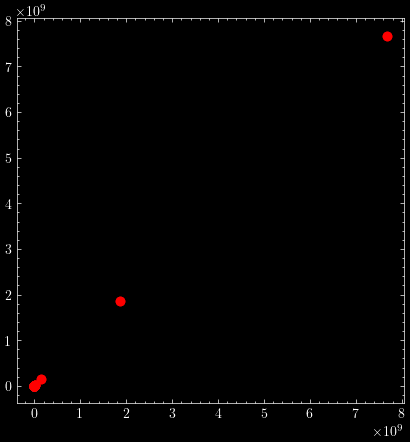

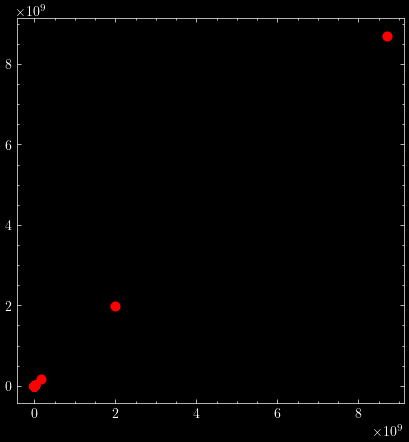

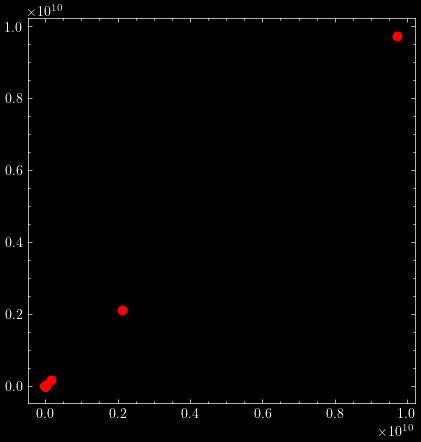

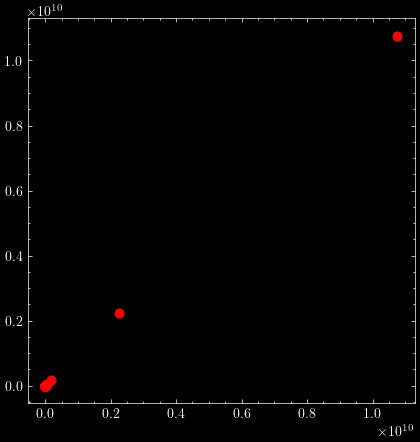

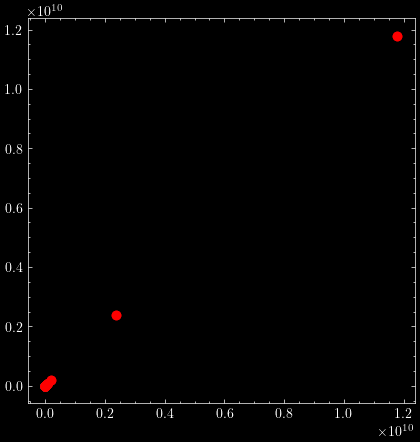

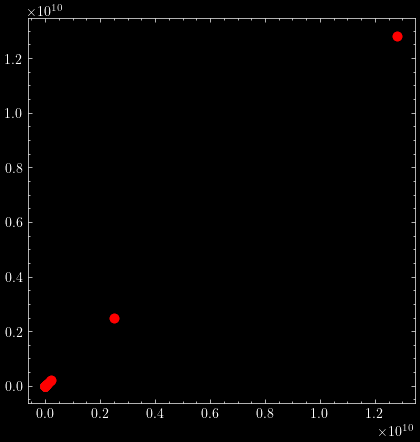

KeyboardInterrupt: 

<Figure size 500x500 with 0 Axes>

In [21]:
# implement the simulation -> equation 1.10
def multipleParicles(r, v, N, dt):
    r_2_new = np.zeros((N,2))
    r_2_new[0] = r[0] + v[0] * dt / 2

    r_new = np.zeros((N,2))
    v_new = np.zeros((N,2))

    # Energy
    K = 0
    U = 0

    # calculate the distance between the particles -> norm between the positions
    D = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if i != j:
                D[i,j] = np.linalg.norm(r[i] - r[j])

    # calculate the force between the particles -> eq 1.11
    # the shorter the distance the more the particles repell each other
    V = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if D[i,j] != 0:
                V[i,j] = 4 * eta_0 * ( (sigma_0/D[i,j])**12 - (sigma_0/D[i,j])**6)
            else:
                V[i,j] = 0

    # update the particles
    for i in range(N):
        r_2_new[i] = r[i] + v[i] * dt / 2

        # calculate the force on the particle
        F = np.zeros(2)
        for j in range(N):
            if i != j:
                F += V[i,j]
        
        # update the velocity
        v_new[i] = v[i] + F * dt / m_0

        # check box boundary conditions
        tempNewPos = r_2_new[i] + v_new[i] * dt / 2

        if tempNewPos[0] > L:
            delta = tempNewPos[0] - L
            tempNewPos[0] = L - delta
            v_new[i,0] = -v_new[i,0]
        if tempNewPos[0] < 0:
            delta = -tempNewPos[0]
            tempNewPos[0] = delta 
            v_new[i,0] = -v_new[i,0]    
        if tempNewPos[1] > L:
            delta = tempNewPos[1] - L
            tempNewPos[1] = L - delta
            v_new[i,1] = -v_new[i,1]
        if tempNewPos[1] < 0:
            delta = -tempNewPos[1]
            tempNewPos[1] = delta
            v_new[i,1] = -v_new[i,1]

        # update the position
        r_new[i] = tempNewPos

    

    # update the energy
    for i in range(N):
        K += 0.5 * m_0 * np.linalg.norm(v_new[i])**2
        for j in range(N):
            if i != j:
                U += 0.5 * V[i,j]


    return r_new, v_new, K, U
        
singelRun = False
batchRun = True
if (singelRun):
    # run the simulation
    dt = 0.1
    iterations = 100
    plt.figure(figsize=(5,5))

    r_init = r
    v_init = v

    # run the simulation
    for i in range(iterations):
        r, v = multipleParicles(r, v, N, dt)

    # plot the initial positions
    plt.scatter(r_init[:,0], r_init[:,1], color='w', label='Initial positions')
    plt.scatter(r[:,0], r[:,1], color='r', label='Positions after 1000 iteration')
    plt.show()
    plt.figure(figsize=(5,5))
    plt.quiver(r_init[:,0], r_init[:,1], v_init[:,0], v_init[:,1], color='w', label='Velocity field')
    plt.quiver(r[:,0], r[:,1], v[:,0], v[:,1], color='r', label='Velocity field')

    plt.show()

if (batchRun):
    # run the simulation
    dt = 0.05
    iterations = 1000
    U_t = np.zeros(iterations)
    K_t = np.zeros(iterations)

    for i in range(iterations):
        r, v, K, U = multipleParicles(r, v, N, dt)
        U_t[i] = U
        K_t[i] = K
        if (i % 10 == 0):
            plt.figure(figsize=(5,5))
            plt.scatter(r_init[:,0], r_init[:,1], color='w', label='Initial positions')
            plt.scatter(r[:,0], r[:,1], color='r', label='Positions after 1000 iteration')
            plt.show()

    # plot the energy
    plt.figure(figsize=(8,8))
    plt.plot(K_t, label='Kinetic energy')
    plt.plot(U_t, label='Potential energy')
    plt.plot(K_t + U_t, label='Total energy')
    plt.legend()
    plt.show()



In [ ]:
plt.plot(K_t)